In [168]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for cheking normality

import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import r2_score, accuracy_score,classification_report,confusion_matrix, recall_score, roc_auc_score, roc_curve


from statsmodels.discrete.discrete_model import Logit
import statsmodels.tools as sm
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import scikitplot as skplt #in case of error run <<!pip install scikit-plot>> and run the code again


from sklearn.preprocessing import StandardScaler
from collections import defaultdict

In [236]:
data = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [237]:
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.8+ KB


# Cleaning the data

In [239]:
data.columns.to_list()

['Company_Name',
 'Dependent-Company Status',
 'year of founding',
 'Age of company in years',
 'Internet Activity Score',
 'Short Description of company profile',
 'Industry of company',
 'Focus functions of company',
 'Investors',
 'Employee Count',
 'Employees count MoM change',
 'Has the team size grown',
 'Est. Founding Date',
 'Last Funding Date',
 'Last Funding Amount',
 'Country of company',
 'Continent of company',
 'Number of Investors in Seed',
 'Number of Investors in Angel and or VC',
 'Number of Co-founders',
 'Number of of advisors',
 'Team size Senior leadership',
 'Team size all employees',
 'Presence of a top angel or venture fund in previous round of investment',
 'Number of of repeat investors',
 'Number of  Sales Support material',
 'Worked in top companies',
 'Average size of companies worked for in the past',
 'Have been part of startups in the past?',
 'Have been part of successful startups in the past?',
 'Was he or she partner in Big 5 consulting?',
 'Consulti

In [240]:
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns = data.columns.str.replace("(", "")
data.columns = data.columns.str.replace(")", "")
data.columns = data.columns.str.replace(",", "_")

In [241]:
print("Single valued columns:", data.columns[data.nunique()==1])
print("Single valued columns:", data.columns[data.nunique()==472])

Single valued columns: Index([], dtype='object')
Single valued columns: Index(['Company_Name'], dtype='object')


In [242]:
data.drop(['Company_Name'], axis=1,inplace=True)

In [243]:
data=data.replace('No Info',np.NaN)

In [244]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])
print("Single valued columns:", data.columns[data.nunique()==472])

Duplicates: 2
Missing values: 8063
Single valued columns: Index([], dtype='object')
Single valued columns: Index([], dtype='object')


In [245]:
data.drop_duplicates(inplace=True)

In [246]:
data.shape

(470, 115)

In [247]:
for i in data:
    print(i, data[i].value_counts())

Dependent_Company_Status Success    304
Failed     166
Name: Dependent_Company_Status, dtype: int64
year_of_founding 2010    76
2012    71
2011    70
2009    49
2007    42
2008    33
2005    23
2013    20
2006    14
2000     4
2002     3
2003     2
2004     2
1999     1
1997     1
Name: year_of_founding, dtype: int64
Age_of_company_in_years 4     76
2     71
3     70
5     49
7     42
6     33
9     23
1     20
8     14
14     4
12     3
11     2
10     2
17     1
15     1
Name: Age_of_company_in_years, dtype: int64
Internet_Activity_Score  0.0      22
 1.0       7
-2.0       6
-8.0       5
 398.0     4
 75.0      4
-69.0      4
-4.0       4
-6.0       4
 16.0      4
 56.0      3
 89.0      3
 40.0      3
-24.0      3
-1.0       3
-91.0      3
 98.0      3
-10.0      3
-14.0      3
-3.0       3
 13.0      3
-16.0      3
 68.0      3
-13.0      3
 61.0      3
 53.0      3
 242.0     3
 162.0     2
-46.0      2
 140.0     2
          ..
-169.0     1
 101.0     1
 241.0     1
 76.0      1

Product_or_service_company? Service    231
Product    205
Both        24
Name: Product_or_service_company?, dtype: int64
Catering_to_product/service_across_verticals No     230
Yes    229
Name: Catering_to_product/service_across_verticals, dtype: int64
Focus_on_private_or_public_data? Private    162
Public     119
no         112
Both        68
Name: Focus_on_private_or_public_data?, dtype: int64
Focus_on_consumer_data? No     280
Yes    181
Name: Focus_on_consumer_data?, dtype: int64
Focus_on_structured_or_unstructured_data Structured        166
Both              119
no                 97
Unstructured       72
not applicable      7
Name: Focus_on_structured_or_unstructured_data, dtype: int64
Subscription_based_business Yes    266
No     191
Name: Subscription_based_business, dtype: int64
Cloud_or_platform_based_serive/product? Platform    294
Both         68
Cloud        62
none         31
cloud         3
Name: Cloud_or_platform_based_serive/product?, dtype: int64
Local_or_global_playe

Percent_skill_Entrepreneurship 0              131
11.11111111     29
5.555555556     19
16.66666667     19
11.76470588     16
5.882352941     13
8.333333333     12
1.851851852      9
2.777777778      8
6.25             8
7.692307692      7
2.941176471      6
6.666666667      6
13.33333333      5
10               5
12.5             5
7.142857143      5
20               5
25               5
17.64705882      4
3.125            4
7.407407407      3
18.18181818      3
11.4379085       2
4.166666667      2
100              2
15.38461538      2
9.090909091      2
10.52631579      2
18.75            2
              ... 
9.401709402      1
27.27272727      1
4.074074074      1
15.25735294      1
8.994708995      1
12.96296296      1
13.56837607      1
23.07692308      1
21.42857143      1
8.465608466      1
22.22222222      1
13.88888889      1
5.664488017      1
11.60130719      1
12.87878788      1
14.44444444      1
8.680555556      1
15.28520499      1
9.444444444      1
8.823529412      1


In [248]:
# creating new dataframe to see which columns containe highest number of missing values
df = pd.DataFrame(data.isnull().sum(axis = 0), columns = ['Missing_values'])
df.head()

,Missing_values
Dependent_Company_Status,0
year_of_founding,59
Age_of_company_in_years,59
Internet_Activity_Score,65
Short_Description_of_company_profile,149


In [249]:
df.nlargest(20, 'Missing_values')

,Missing_values
Employee_benefits_and_salary_structures,349
Client_Reputation,273
Employees_count_MoM_change,203
Gartner_hype_cycle_stage,170
Time_to_maturity_of_technology_in_years,170
Employee_Count,166
Last_Funding_Amount,158
google_page_rank_of_company_website,154
Short_Description_of_company_profile,149
Investors,139


In [250]:
# dropping the columns with the most missing values
data=data.drop(['Employee_benefits_and_salary_structures','Client_Reputation','Employees_count_MoM_change', 'Gartner_hype_cycle_stage','Employee_Count','Last_Funding_Amount', 'google_page_rank_of_company_website', 'Short_Description_of_company_profile','Investors','Invested_through_global_incubation_competitions?', 'Last_round_of_funding_received_in_milionUSD','Employees_per_year_of_company_existence','Industry_of_company'], axis=1)


In [251]:
print("Number of rows with missing values:",sum(data.count(axis=1) < len(data.columns)))

Number of rows with missing values: 324


In [252]:
# let's drop some rows with high number of missing vlues
df1 = pd.DataFrame(data.isnull().sum(axis=1), columns = ['Missing_values'])
df1.head()

,Missing_values
0,6
1,2
2,0
3,1
4,1


In [253]:
df1.nlargest(20, 'Missing_values')

,Missing_values
458,93
423,92
424,91
426,89
427,78
425,71
422,69
429,69
401,68
419,68


In [254]:
data=data.drop([458,423,424,426,427,425,422,429,401,419,433,469,407,421,432,470,394,405,406,408])

In [255]:
df3=pd.DataFrame(data.isnull().sum(axis = 0), columns = ['Missing_values'])
df3.nlargest(20, 'Missing_values')

,Missing_values
Time_to_maturity_of_technology_in_years,150
Last_Funding_Date,110
Est._Founding_Date,96
Presence_of_a_top_angel_or_venture_fund_in_previous_round_of_investment,85
Highest_education,82
Years_of_education,82
Number_of__of_Partners_of_company,81
Specialization_of_highest_education,80
Survival_through_recession__based_on_existence_of_the_company_through_recession_times,78
Avg_time_to_investment___average_across_all_rounds__measured_from_previous_investment,78


In [256]:
# dropping some other columns
data=data.drop(['Time_to_maturity_of_technology_in_years','Last_Funding_Date','Est._Founding_Date','Presence_of_a_top_angel_or_venture_fund_in_previous_round_of_investment'], axis=1)
print("Number of rows with missing values:",sum(data.count(axis=1) < len(data.columns)))

Number of rows with missing values: 219


In [257]:
data.shape

(450, 98)

In [258]:
#Dropping rows with NaN
data=data.dropna()

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 391
Data columns (total 98 columns):
Dependent_Company_Status                                                                                                             231 non-null object
year_of_founding                                                                                                                     231 non-null object
Age_of_company_in_years                                                                                                              231 non-null object
Internet_Activity_Score                                                                                                              231 non-null float64
Focus_functions_of_company                                                                                                           231 non-null object
Has_the_team_size_grown                                                                                                          

In [260]:
#Checking for missing values, duplicates and single value columns
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])
print("Too much valued columns:", data.columns[data.nunique()==225])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')
Too much valued columns: Index([], dtype='object')


In [261]:
data.dtypes

Dependent_Company_Status                                                                  object
year_of_founding                                                                          object
Age_of_company_in_years                                                                   object
Internet_Activity_Score                                                                  float64
Focus_functions_of_company                                                                object
Has_the_team_size_grown                                                                   object
Country_of_company                                                                        object
Continent_of_company                                                                      object
Number_of_Investors_in_Seed                                                               object
Number_of_Investors_in_Angel_and_or_VC                                                    object
Number_of_Co_founders         

In [262]:
data.columns.to_list()

['Dependent_Company_Status',
 'year_of_founding',
 'Age_of_company_in_years',
 'Internet_Activity_Score',
 'Focus_functions_of_company',
 'Has_the_team_size_grown',
 'Country_of_company',
 'Continent_of_company',
 'Number_of_Investors_in_Seed',
 'Number_of_Investors_in_Angel_and_or_VC',
 'Number_of_Co_founders',
 'Number_of_of_advisors',
 'Team_size_Senior_leadership',
 'Team_size_all_employees',
 'Number_of_of_repeat_investors',
 'Number_of__Sales_Support_material',
 'Worked_in_top_companies',
 'Average_size_of_companies_worked_for_in_the_past',
 'Have_been_part_of_startups_in_the_past?',
 'Have_been_part_of_successful_startups_in_the_past?',
 'Was_he_or_she_partner_in_Big_5_consulting?',
 'Consulting_experience?',
 'Product_or_service_company?',
 'Catering_to_product/service_across_verticals',
 'Focus_on_private_or_public_data?',
 'Focus_on_consumer_data?',
 'Focus_on_structured_or_unstructured_data',
 'Subscription_based_business',
 'Cloud_or_platform_based_serive/product?',
 'Local

In [263]:
# there are some numeric columns that have type object, let's make them float or int to use them further for visualization 
data.Renown_score=data['Renown_score'].astype(str).astype(int)
data.Percent_skill_Investment=data['Percent_skill_Investment'].astype(str).astype('float')
data.Percent_skill_Finance=data['Percent_skill_Finance'].astype(str).astype('float')
data.Percent_skill_Consulting=data['Percent_skill_Consulting'].astype(str).astype('float')
data.Percent_skill_Law=data['Percent_skill_Law'].astype(str).astype('float')
data.Percent_skill_Domain=data['Percent_skill_Domain'].astype(str).astype('float')
data.Percent_skill_Sales=data['Percent_skill_Sales'].astype(str).astype('float')
data.Percent_skill_Product_Management=data['Percent_skill_Product_Management'].astype(str).astype('float')
data.Percent_skill_Business_Strategy=data['Percent_skill_Business_Strategy'].astype(str).astype('float')
data.Percent_skill_Data_Science=data['Percent_skill_Data_Science'].astype(str).astype('float')
data.Percent_skill_Leadership=data['Percent_skill_Leadership'].astype(str).astype('float')
data.Percent_skill_Marketing=data['Percent_skill_Marketing'].astype(str).astype('float')
data.Percent_skill_Engineering=data['Percent_skill_Engineering'].astype(str).astype('float')
data.Percent_skill_Operations=data['Percent_skill_Operations'].astype(str).astype('float')
data.Percent_skill_Entrepreneurship=data['Percent_skill_Entrepreneurship'].astype(str).astype('float')
data.Avg_time_to_investment___average_across_all_rounds__measured_from_previous_investment=data['Avg_time_to_investment___average_across_all_rounds__measured_from_previous_investment'].astype(str).astype('float')
data.Time_to_1st_investment_in_months=data['Time_to_1st_investment_in_months'].astype(str).astype('float')
data.Number_of_Direct_competitors=data['Number_of_Direct_competitors'].astype(str).astype('float')
data.Skills_score=data['Skills_score'].astype(str).astype('float')
data.Number_of_Recognitions_for_Founders_and_Co_founders=data['Number_of_Recognitions_for_Founders_and_Co_founders'].astype(str).astype('float')
data.Experience_in_Fortune_1000_organizations=data['Experience_in_Fortune_1000_organizations'].astype(str).astype(int)
data.Experience_in_Fortune_500_organizations=data['Experience_in_Fortune_500_organizations'].astype(str).astype('float')
data.Experience_in_Fortune_100_organizations=data['Experience_in_Fortune_100_organizations'].astype(str).astype('float')
data.Renowned_in_professional_circle=data['Renowned_in_professional_circle'].astype(str).astype('float')
data.Years_of_education=data['Years_of_education'].astype(str).astype('float')
data.Number_of_of_repeat_investors=data['Number_of_of_repeat_investors'].astype(str).astype('float')
data.Team_size_all_employees=data['Team_size_all_employees'].astype(str).astype('float')
data.Number_of_Investors_in_Angel_and_or_VC =data['Number_of_Investors_in_Angel_and_or_VC'].astype(str).astype('float')
data.Number_of_Investors_in_Seed=data['Number_of_Investors_in_Seed'].astype(str).astype('float')
data.Age_of_company_in_years=data['Age_of_company_in_years'].astype(str).astype('float')
data.year_of_founding=data['year_of_founding'].astype(str).astype('float')

In [264]:
# checking unique values of non numeric columns
non_numeric_data=data.select_dtypes(include="object")
non_numeric_data.shape

(231, 62)

In [265]:
for i in non_numeric_data:
    print(i, non_numeric_data[i].value_counts())

Dependent_Company_Status Success    198
Failed      33
Name: Dependent_Company_Status, dtype: int64
Focus_functions_of_company analytics                                               18
technology                                              17
Marketing                                               15
Operations                                              11
marketing                                               11
operation                                               10
operations                                               9
MARKETING                                                9
analytic                                                 5
software                                                 4
service                                                  4
Database Management                                      4
Strategy                                                 3
Marketing & Sales                                        3
sales                                          

#### as we see there are columns that require some corrections in their values, like column Focus_functions_of_company which has values marketing, Marketing, MARKETING...

In [266]:
data['Has_the_team_size_grown'] = data['Has_the_team_size_grown'].replace(['yes', 'YES'], 'Yes')

In [267]:
data['Focus_on_structured_or_unstructured_data'] = data['Focus_on_structured_or_unstructured_data'].replace(['no'], 'not applicable')

In [268]:
data['Cloud_or_platform_based_serive/product?'] = data['Cloud_or_platform_based_serive/product?'].replace(['cloud'], 'Cloud')

In [269]:
data['Number_of__Sales_Support_material'] = data['Number_of__Sales_Support_material'].replace(['high'], 'High')

In [270]:
data['Local_or_global_player'] = data['Local_or_global_player'].replace(['global','GLOBAL','GLObaL'], 'Global')
data['Local_or_global_player'] = data['Local_or_global_player'].replace(['local','LOCAL'], 'Local')

In [271]:
#dropping columns with many unclustered variables
data=data.drop(['Focus_functions_of_company','Specialization_of_highest_education'], axis=1)

In [272]:
non_numeric_data1=data.select_dtypes(include="object")
non_numeric_data1.shape

(231, 60)

In [273]:
for i in non_numeric_data1:
    print(i, non_numeric_data1[i].value_counts())

Dependent_Company_Status Success    198
Failed      33
Name: Dependent_Company_Status, dtype: int64
Has_the_team_size_grown No     129
Yes    102
Name: Has_the_team_size_grown, dtype: int64
Country_of_company United States         170
United Kingdom         19
India                   8
France                  7
Spain                   4
Belgium                 4
Denmark                 3
Germany                 3
Bulgaria                3
Azerbaijan              2
Finland                 1
Singapore               1
Austria                 1
Russian Federation      1
Canada                  1
Switzerland             1
Sweden                  1
Czech Republic          1
Name: Country_of_company, dtype: int64
Continent_of_company North America    171
Europe            51
Asia               9
Name: Continent_of_company, dtype: int64
Number_of__Sales_Support_material low        77
medium     76
High       52
Nothing    26
Name: Number_of__Sales_Support_material, dtype: int64
Worked_in_top_c

# Descriptive Analysis

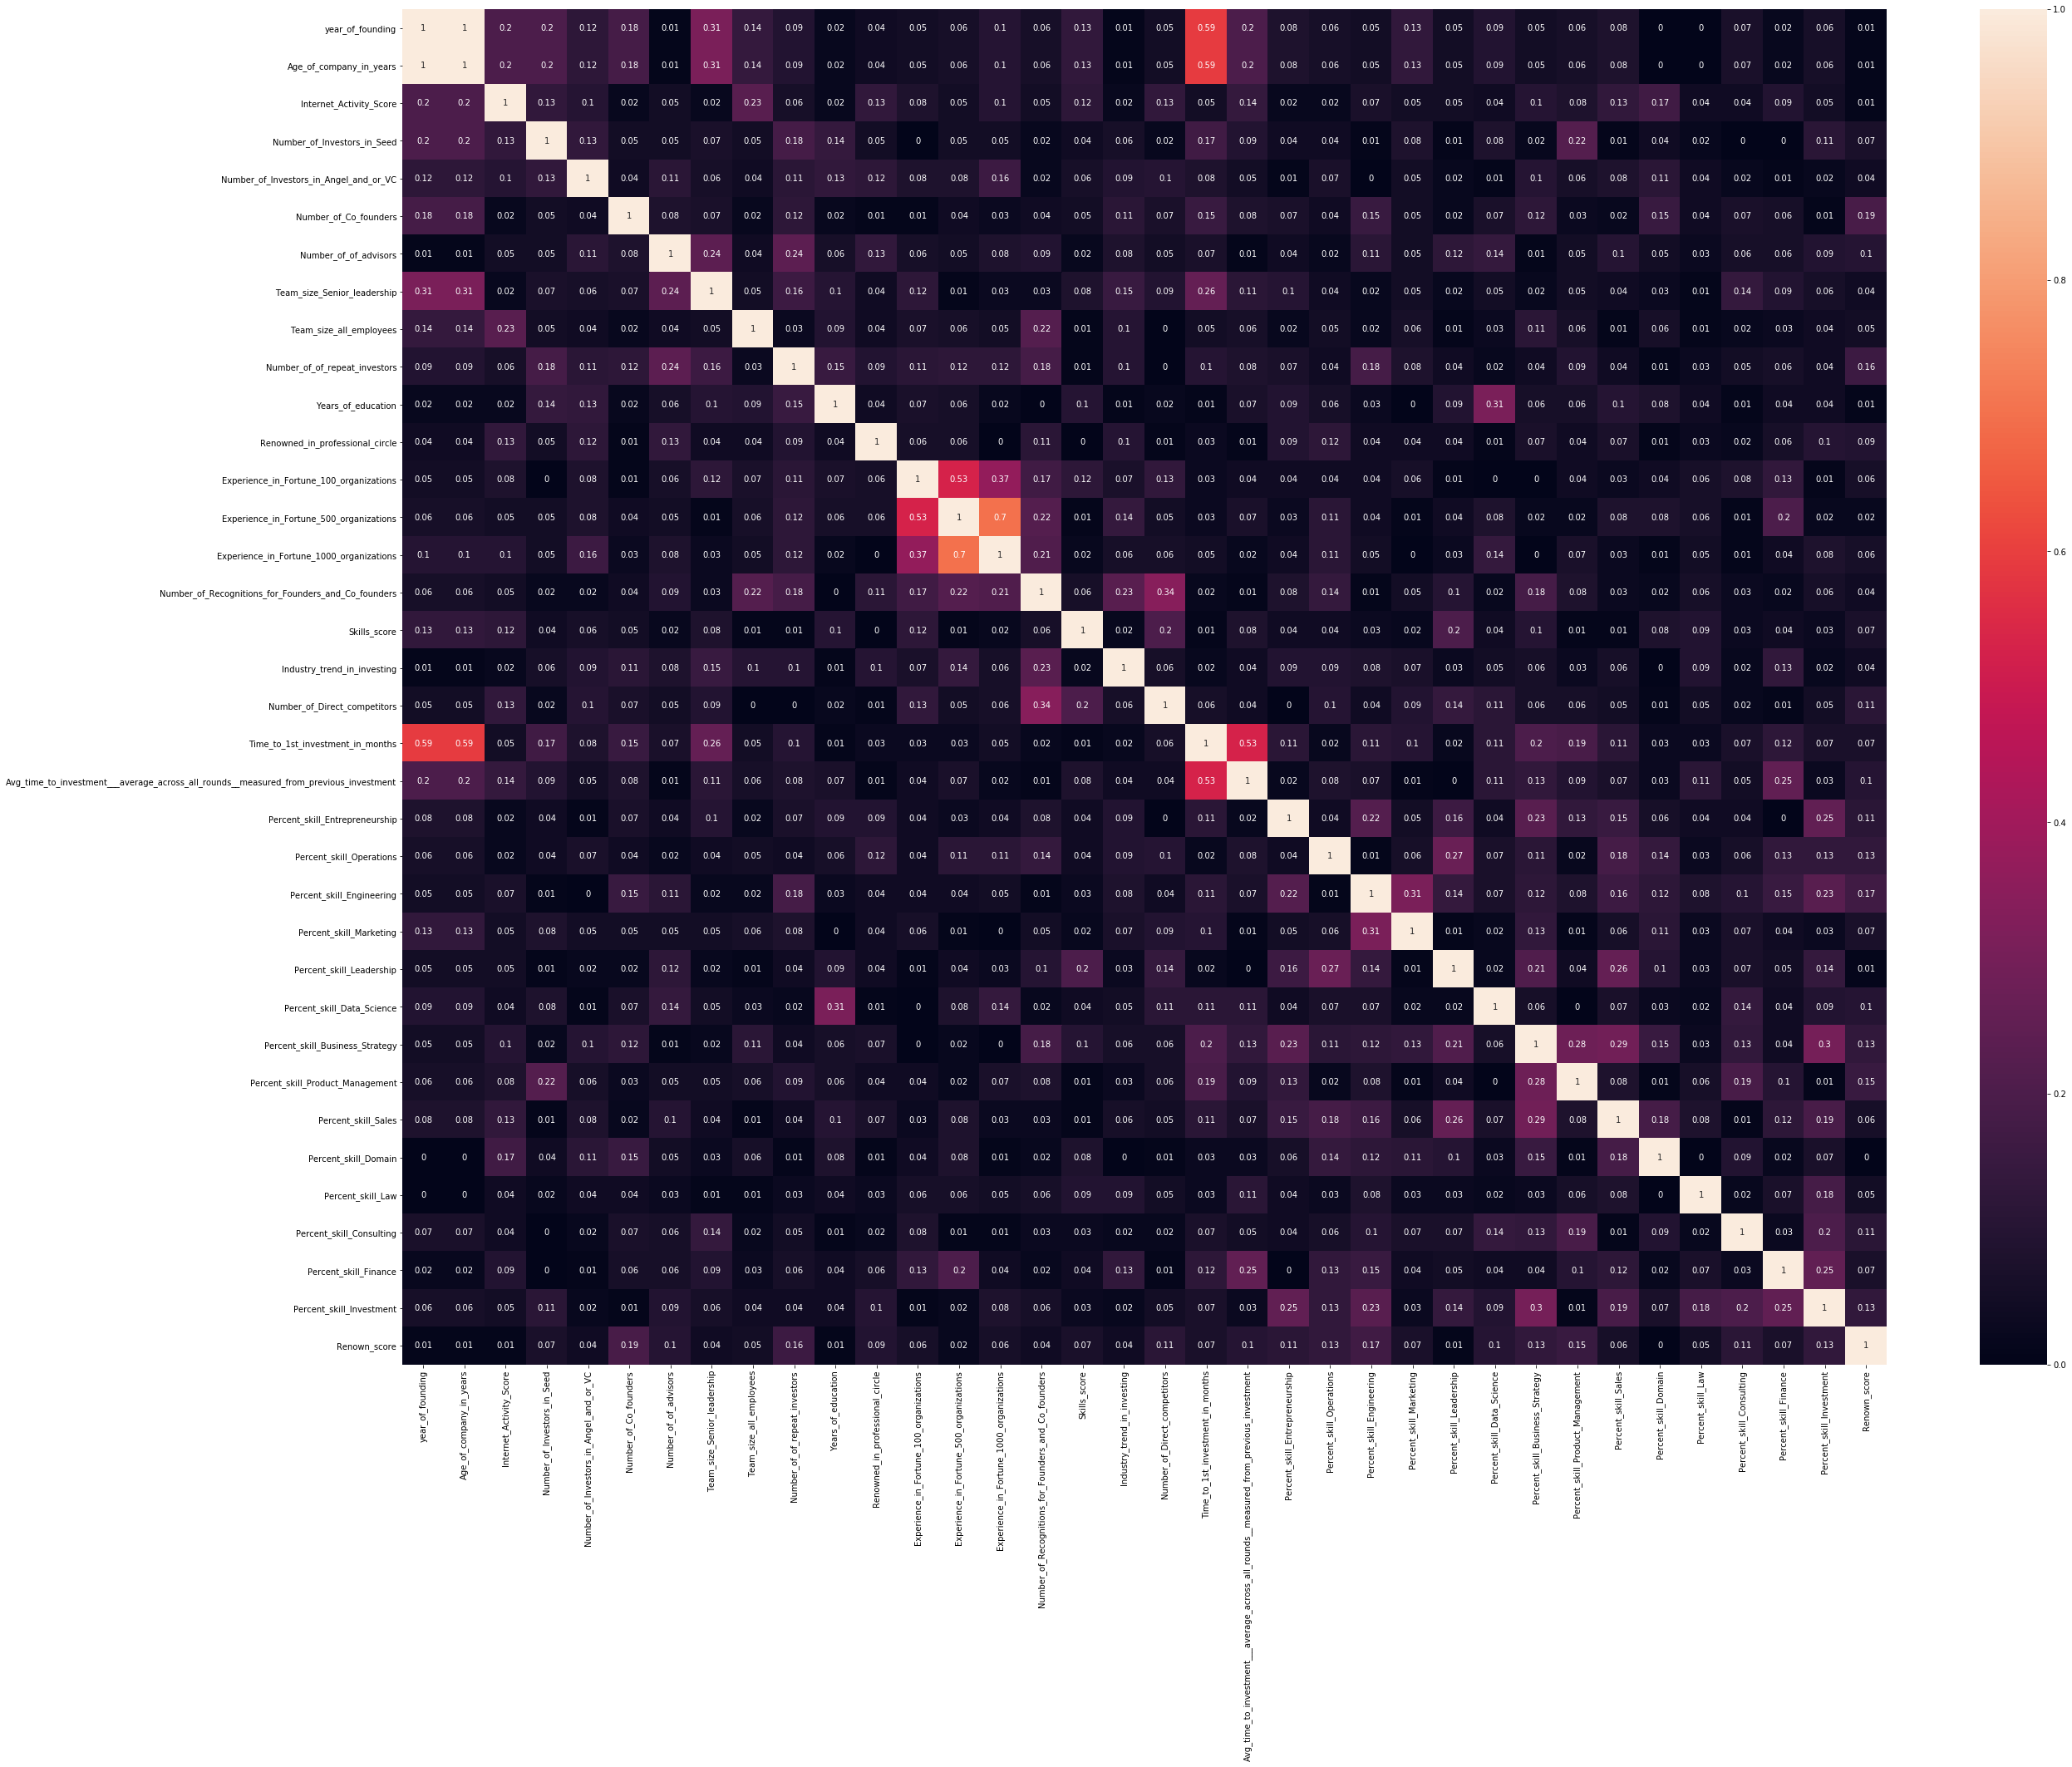

In [274]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

In [275]:
# from heatmap it is clear that some variables are correlated with each other
# droping columns to avoid multicollinearity
data.drop(['year_of_founding','Time_to_1st_investment_in_months','Percent_skill_Consulting','Avg_time_to_investment___average_across_all_rounds__measured_from_previous_investment'], axis=1,inplace=True)

In [276]:
data.drop(['Experience_in_Fortune_1000_organizations','Experience_in_Fortune_500_organizations'], axis=1,inplace=True)

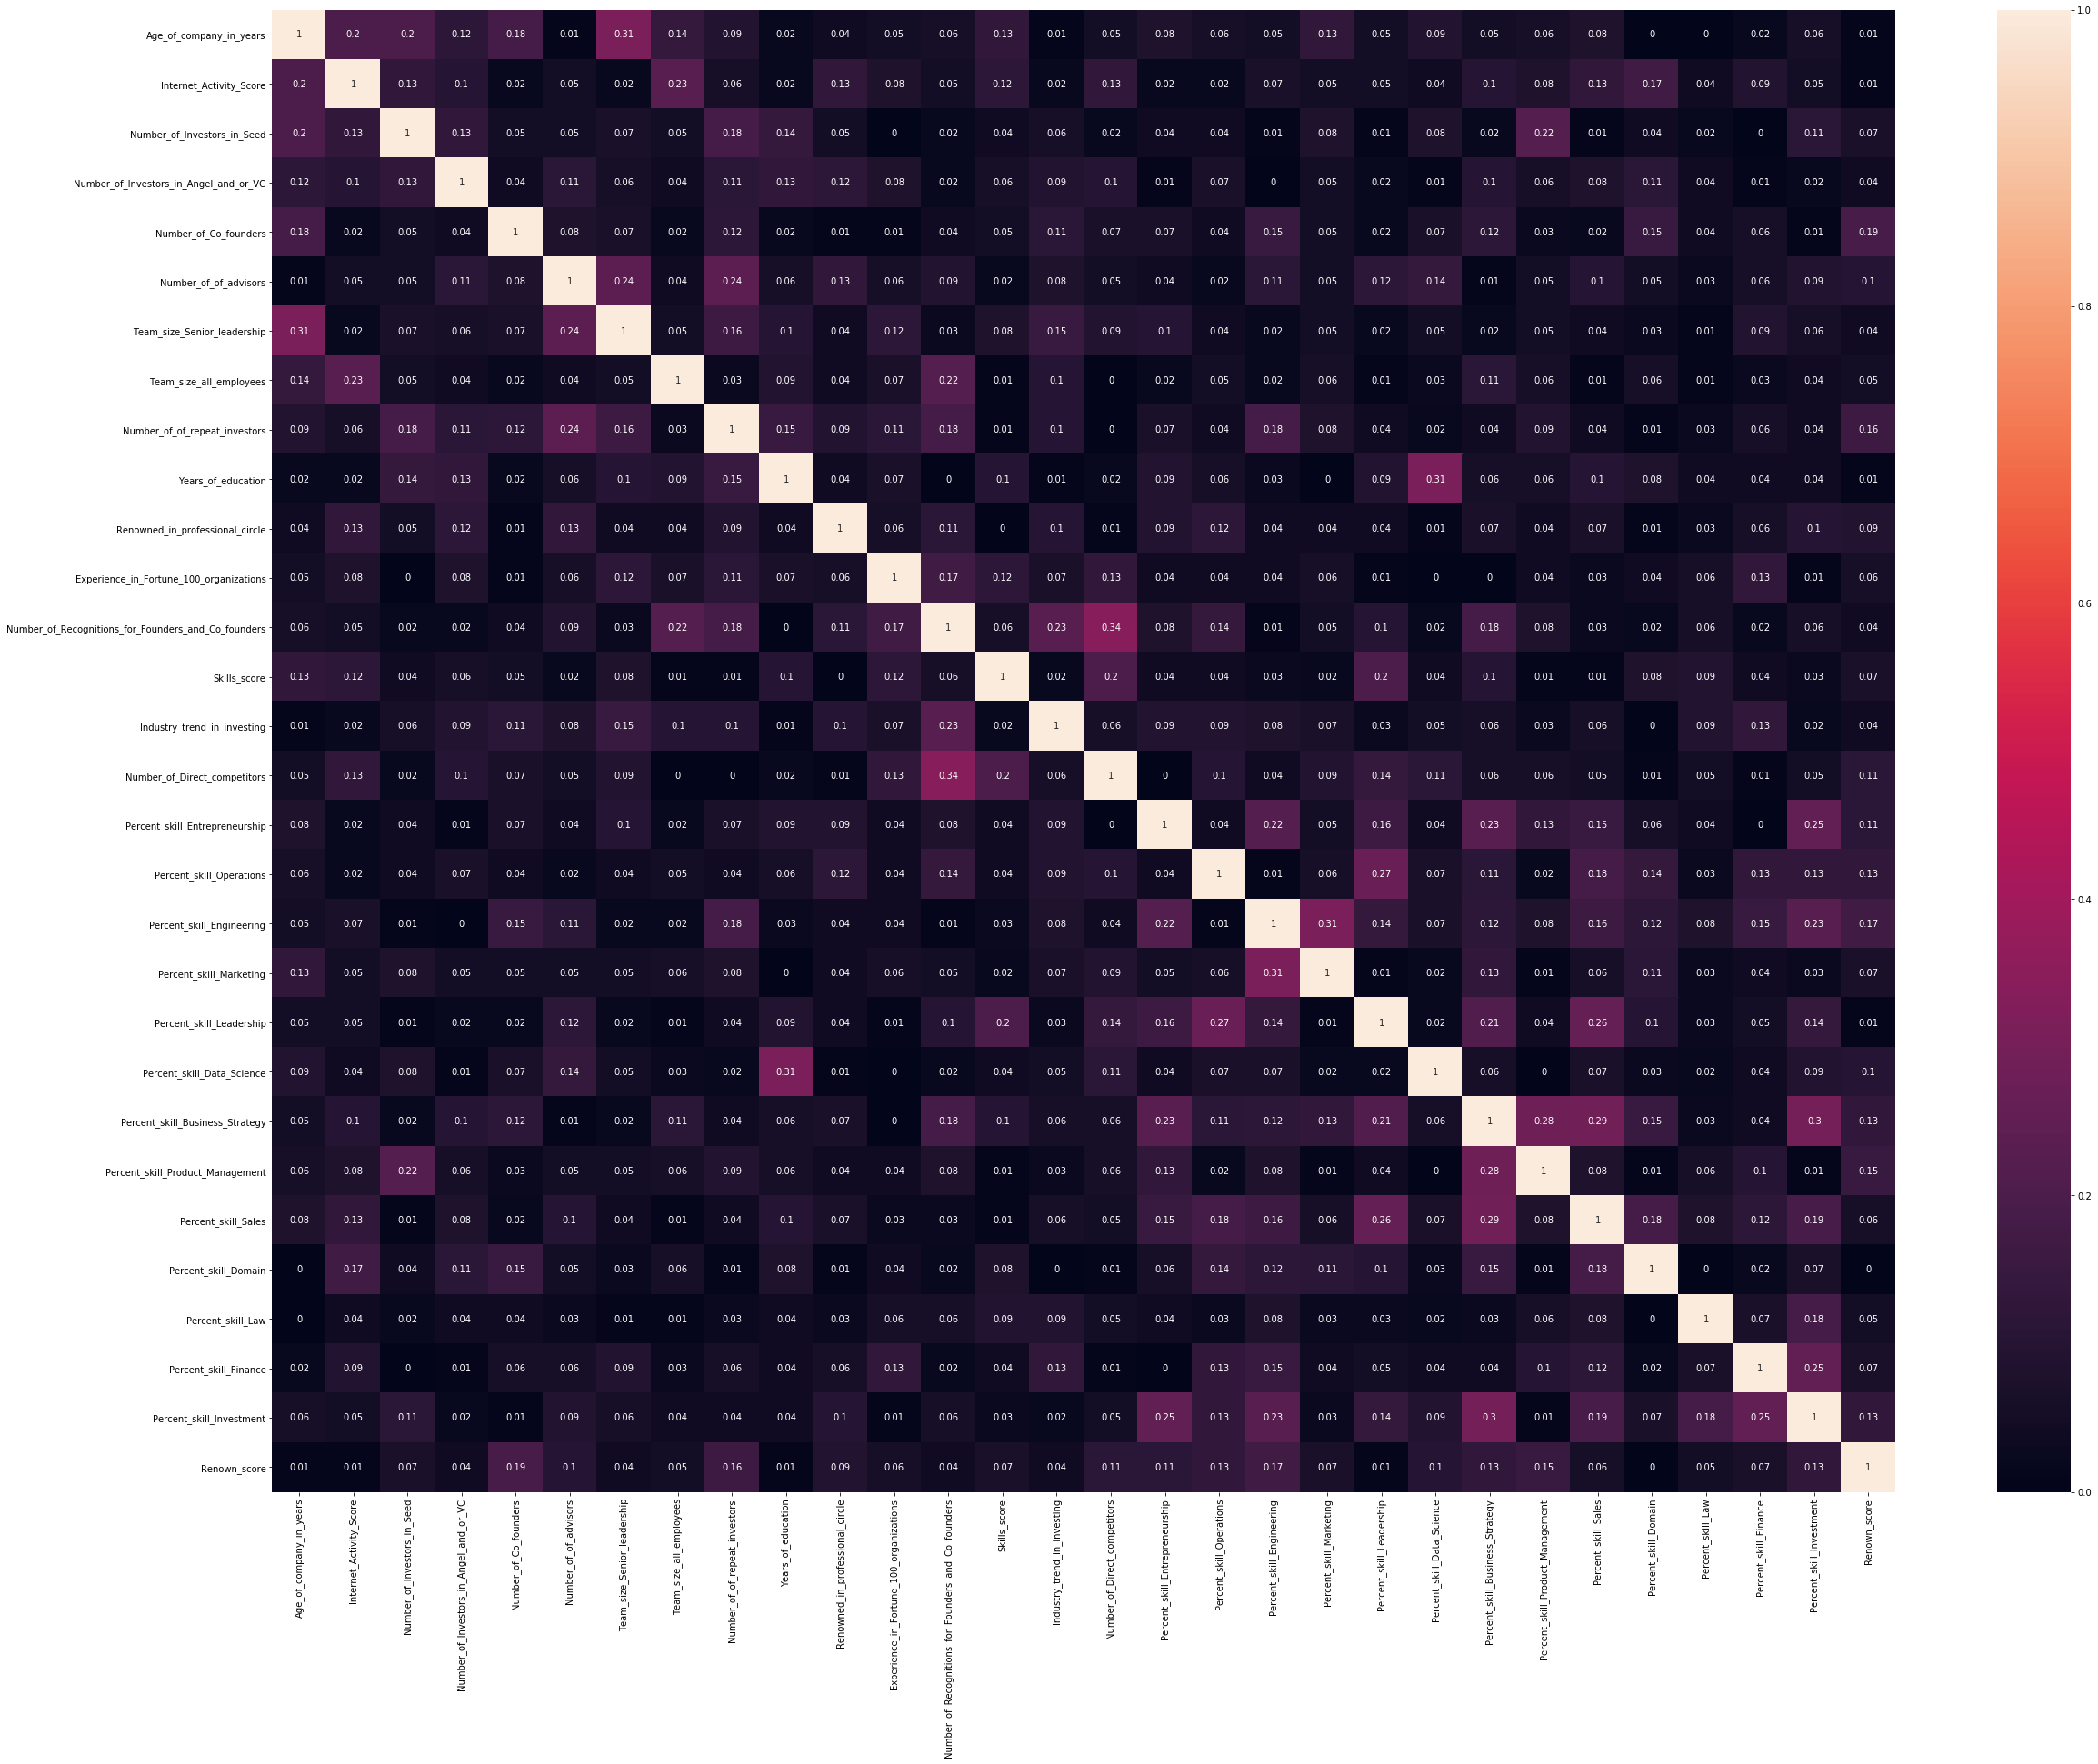

In [277]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

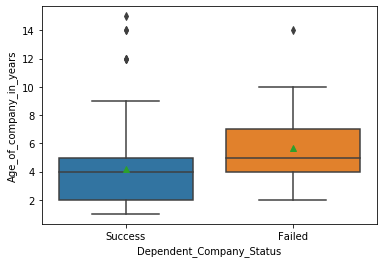

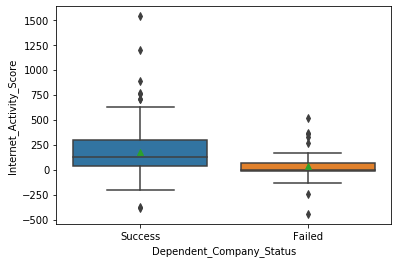

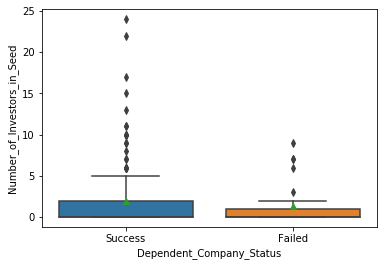

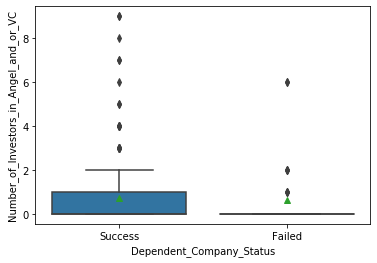

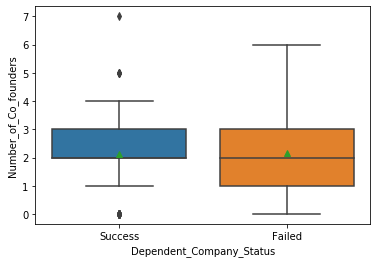

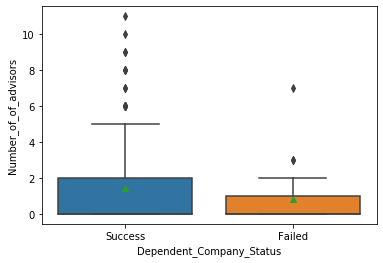

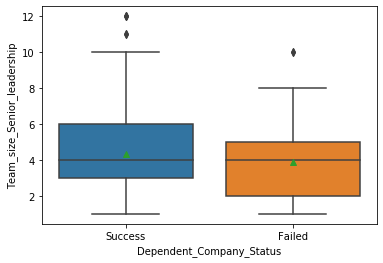

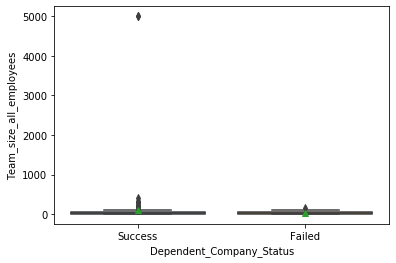

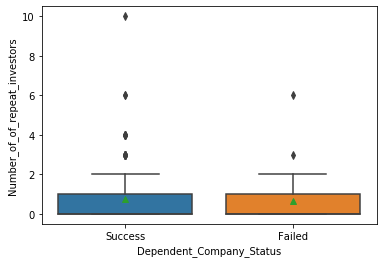

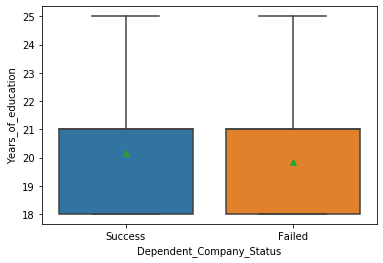

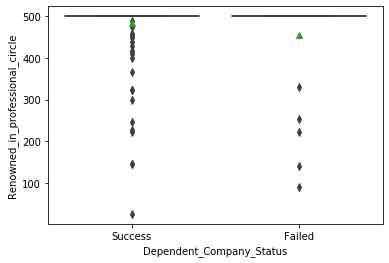

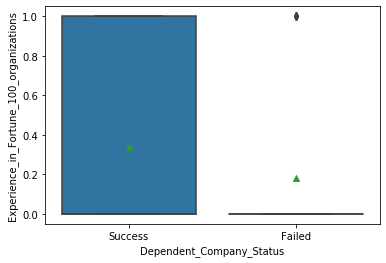

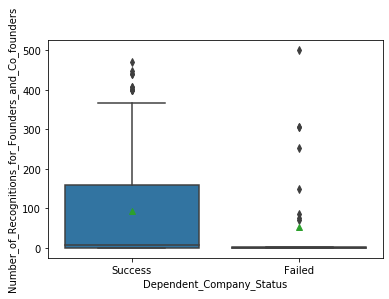

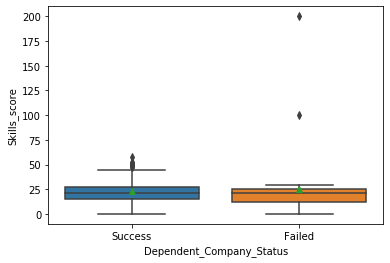

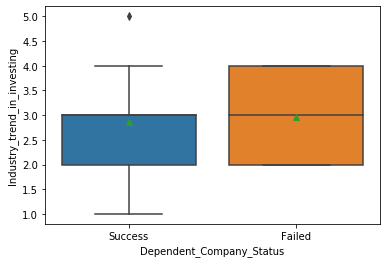

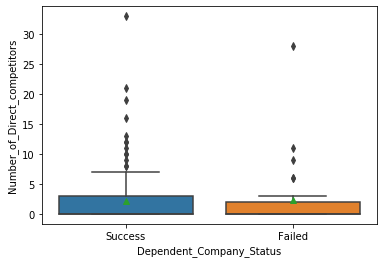

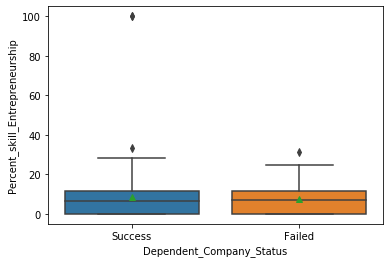

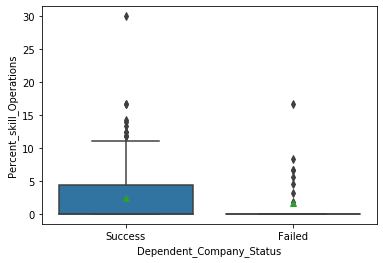

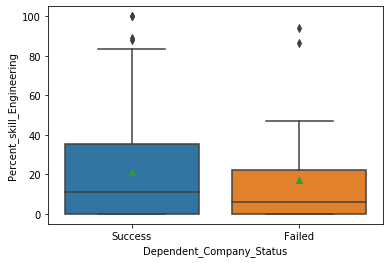

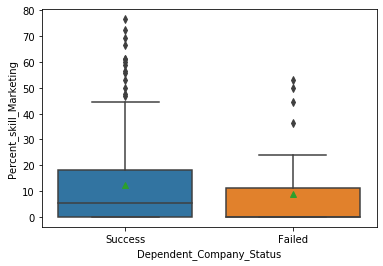

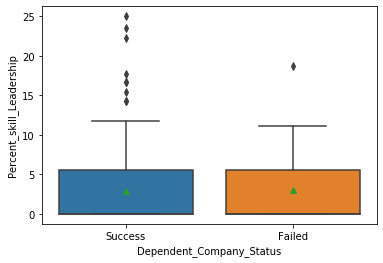

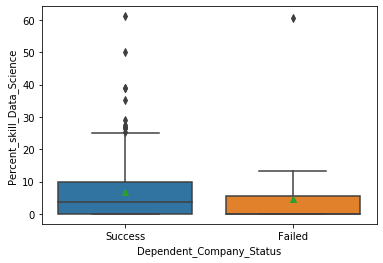

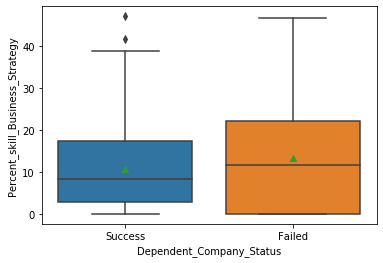

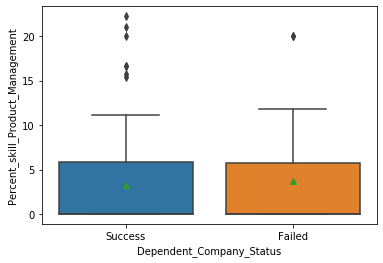

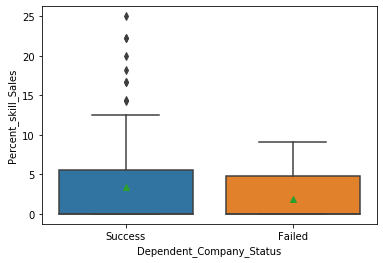

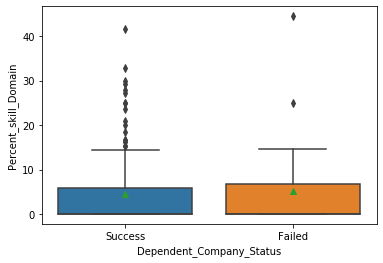

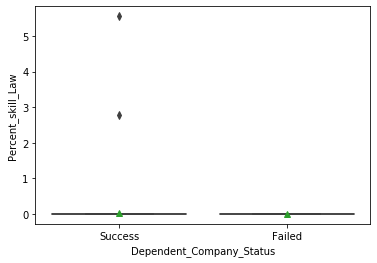

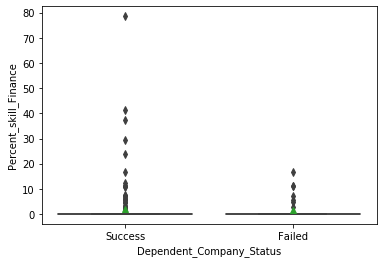

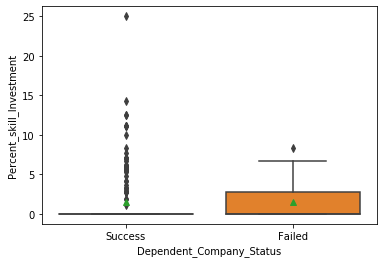

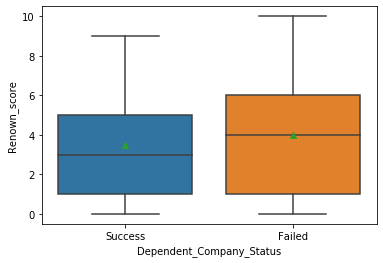

In [278]:
for i in data.dtypes[data.dtypes!="O"].index.tolist():
    sns.boxplot(data=data,y=i,x="Dependent_Company_Status", showmeans=True)
    plt.show()

#### boxplots show that the success and failure of companies are not significantly different in case of some variables:'Number_of_of_repeat_investors','Years_of_education', 'Percent_skill_Leadership', 'Percent_skill_Product_Management'

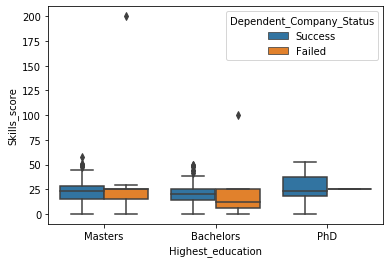

In [279]:
sns.boxplot(x="Highest_education", y="Skills_score", data=data, hue="Dependent_Company_Status")

In [280]:
BEntry_rate=data.groupby("Country_of_company")["Barriers_of_entry_for_the_competitors"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()

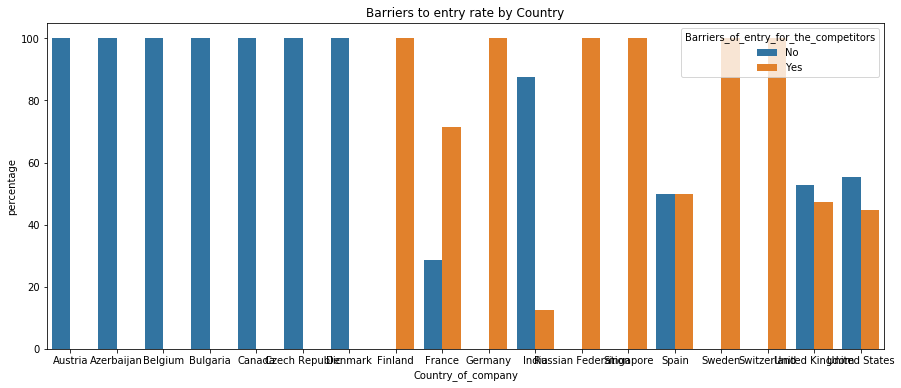

In [281]:
plt.figure(figsize=(15,6))
sns.barplot(x="Country_of_company",y="percentage", hue="Barriers_of_entry_for_the_competitors",data=BEntry_rate)
plt.title("Barriers to entry rate by Country")
plt.show()

#### Calculate the percentage of churn in your dataset to have some opinion on general accuracy you could benchmark without using any model (naive approach)

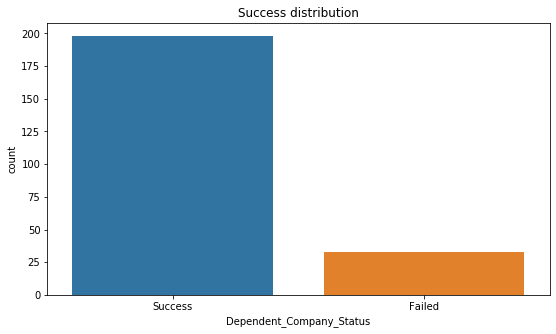

In [282]:
plt.figure(figsize=(9,5))
sns.countplot(data.Dependent_Company_Status)
plt.title("Success distribution")
plt.show()

In [283]:
#lets count the benchmark for company success 
data.Dependent_Company_Status.value_counts(normalize=True).mul(100).rename("Success percentage")

Success    85.714286
Failed     14.285714
Name: Success percentage, dtype: float64

In [284]:
data.Dependent_Company_Status.replace(to_replace=dict(Success=1, Failed=0), inplace=True)
data.head()

,Dependent_Company_Status,Age_of_company_in_years,Internet_Activity_Score,Has_the_team_size_grown,Country_of_company,Continent_of_company,Number_of_Investors_in_Seed,Number_of_Investors_in_Angel_and_or_VC,Number_of_Co_founders,Number_of_of_advisors,...,Percent_skill_Leadership,Percent_skill_Data_Science,Percent_skill_Business_Strategy,Percent_skill_Product_Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Finance,Percent_skill_Investment,Renown_score
1,1,3.0,125.0,No,United States,North America,5.0,0.0,2,0,...,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,8
2,1,3.0,455.0,No,United States,North America,15.0,0.0,3,0,...,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,9
4,1,4.0,496.0,No,United States,North America,7.0,0.0,1,1,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6
5,1,4.0,106.0,No,United States,North America,2.0,0.0,4,0,...,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,0.0,0.0,0.0,6
7,1,4.0,139.0,No,United States,North America,0.0,0.0,3,4,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2


# logistic regression

In [285]:
data=pd.get_dummies(data,drop_first=True)

In [286]:
#separating X and Y
Y=data["Dependent_Company_Status"]
X=data.drop("Dependent_Company_Status",axis=1)

In [287]:
#let's split X and Y data into test and train datasets, test data is 20% of overall data
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.20, random_state=42)

In [288]:
#setting Logistic regression parameters range
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,5,100)}

In [289]:
#gridsearching to find best params
#verbose is for showing this sentence-"Fitting 3 folds for each of 200 candidates, totalling 600 fits"
gridsearch_logit = GridSearchCV(estimator=LogisticRegression(random_state=42),
                        param_grid=param_logit,
                        cv=5,scoring='roc_auc',verbose=1,n_jobs=2)
gridsearch_logit.fit(X0,Y0)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 171 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   39.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'C': array([1.00000000e-04...
       4.24243939e+00, 4.29294343e+00, 4.34344747e+00, 4.39395152e+00,
       4.44445556e+00, 4.49495960e+00, 4.54546364e+00, 4.59596768e+00,
       4.64647172e+00, 4.69697576e+00, 4.74747980e+00, 4.79798384e+00,
       4.84848788e+00, 4.89899192e+00, 4.94949596e+00, 5.00000000e+00]),
       

In [290]:
gridsearch_logit.best_params_

{'C': 0.10110808080808081, 'class_weight': 'balanced'}

In [291]:
#let's construct logit with the best parameters 
logit=LogisticRegression(class_weight='balanced',C=0.10110808080808081,random_state=42).fit(X0,Y0)

In [292]:
#getting probabilities of being 1 (probability of being successful)
Y0_logit=logit.predict_proba(X0)[:,1]
Y1_logit=logit.predict_proba(X1)[:,1]

In [336]:
#calculating roc auc score
print("ROC_AUC Train not scaled Logit:",roc_auc_score(Y0,Y0_logit).round(2))
print("ROC_AUC Test not scaled Logit:",roc_auc_score(Y1,Y1_logit).round(2))
print("Mean 6-fold ROC AUC score for not scaled logit:",np.mean(cross_val_score(estimator=logit, X=X,y=Y,cv=6, scoring="roc_auc").round(2)))

ROC_AUC Train not scaled Logit: 0.99
ROC_AUC Test not scaled Logit: 0.93
Mean 6-fold ROC AUC score for not scaled logit: 0.7566666666666668


#### There is a clear overfitting here. Later on I will drop some variables to fight overfitting.

# Decision Tree

In [294]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(5,15),"min_samples_leaf":range(10,125,5),
          "class_weight":["balanced", None],}

In [295]:
#Cross-Validated Gridsearch using parameters, use n_jobs=-1 for faster computing and 
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_grid=param_dt,scoring="roc_auc",cv=5, verbose=1, n_jobs=2)
gs_dt.fit(X0,Y0)

Fitting 5 folds for each of 460 candidates, totalling 2300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 688 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done 2300 out of 2300 | elapsed:   16.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(5, 15),
                         'mi

In [296]:
#let's see the optimal parameters
gs_dt.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 15}

In [299]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight=None,max_depth=5,
                             min_samples_leaf=15, random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [300]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight='balanced',max_depth=5,
                             min_samples_leaf=20, random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [334]:
#calculating roc auc score 
print("ROC_AUC Train for Decision Tree:",roc_auc_score(Y0,Y0_dt_grid).round(2))
print("ROC_AUC Test for Decision Tree:",roc_auc_score(Y1,Y1_dt_grid).round(2))
print("Mean 6-fold ROC AUC score for Decision Tree:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=6, scoring="roc_auc")).round(2))

ROC_AUC Train for Decision Tree: 0.89
ROC_AUC Test for Decision Tree: 0.89
Mean 6-fold ROC AUC score for Decision Tree: 0.63


In [303]:
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head()

,Feature_imp
Internet_Activity_Score,0.398538
Catering_to_product/service_across_verticals_Yes,0.246538
Percent_skill_Product_Management,0.220460
Focus_on_structured_or_unstructured_data_Structured,0.134464
Top_forums_like_'Tech_crunch'_or_'Venture_beat'_talking_about_the_company/model___How_much_is_it_being_talked_about?_Medium,0.000000


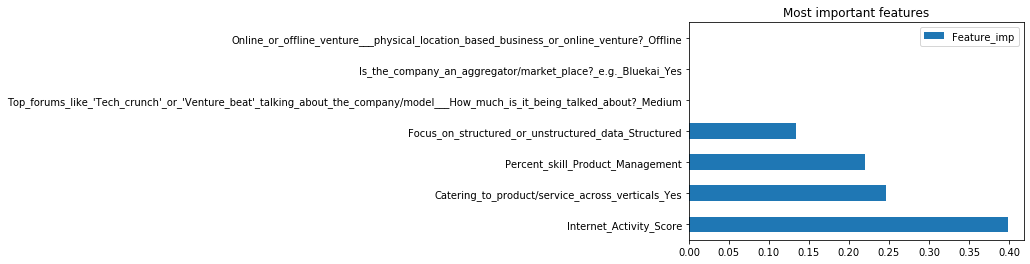

In [304]:
feat_imp.head(7).plot.barh()
plt.title("Most important features")
plt.show()

# Random Forest 

In [305]:
param_rf={  'max_depth': range(5,15),
            'min_samples_leaf': range(15, 95, 5),
             'class_weight': ['balanced', None] }

In [306]:
gs_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_grid=param_rf,cv=5, scoring="roc_auc", verbose=1)
gs_rf.fit(X0,Y0)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   41.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [307]:
gs_rf.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 30}

In [308]:
rf=RandomForestClassifier(random_state=42,class_weight=None,max_depth=5,min_samples_leaf=30).fit(X0,Y0)

#getting probabilities
Y0_rf=rf.predict_proba(X0)[:,1]
Y1_rf=rf.predict_proba(X1)[:,1]

In [309]:
print("ROC_AUC Train for Random Forest:",roc_auc_score(Y0,Y0_rf).round(2))
print("ROC_AUC Test for Random Forest:",roc_auc_score(Y1,Y1_rf).round(2))

ROC_AUC Train for Random Forest: 0.9
ROC_AUC Test for Random Forest: 0.95


In [331]:
#Mean cross val score for model with default hyperparameters
print("Mean 6-fold ROC AUC score for Random Forest:",np.mean(cross_val_score(estimator=rf, X=X,y=Y,cv=6, scoring="roc_auc",)).round(2))

Mean 6-fold ROC AUC score for Random Forest: 0.83


# Gradient boosting

In [311]:
#gradient boosting doesn't have "class_weight" parameter, so setting new parameters dictionary
param_gb={'max_depth': range(4, 11),
          'min_samples_leaf': range(10, 140, 10),
         'n_estimators':range(200,320,20)}

In [312]:
#Random Forest Regression
#Cross-Validated Gridsearch using parameters, use n_jobs=-1 for faster computing and 
gs_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_grid=param_gb,
                   cv=5, scoring="roc_auc", verbose=1, n_jobs=2)
gs_gb.fit(X0,Y0)

Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   30.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   49.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 2730 out of 2730 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [318]:
gs_gb.best_params_

{'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 200}

In [320]:
#fitting the model with best parameters
gb=GradientBoostingClassifier(random_state=42,max_depth=4,min_samples_leaf=50, n_estimators=200).fit(X0,Y0)
#getting probabilities
Y0_gb=gb.predict_proba(X0)[:,1]
Y1_gb=gb.predict_proba(X1)[:,1]

In [330]:
#calculating roc auc score 
print("ROC_AUC Train for Tuned Gradient Boosting:",roc_auc_score(Y0,Y0_gb).round(2))
print("ROC_AUC Test for Tuned Gradinet Boosting:",roc_auc_score(Y1,Y1_gb).round(2))
#Mean cross val score for model with default hyperparameters
print("Mean 6-fold ROC AUC score for Gradinet Boosting Tuned hyperparameters:",np.mean(cross_val_score(estimator=gb, X=X,y=Y,cv=6, scoring="roc_auc",)).round(2))

ROC_AUC Train for Tuned Gradient Boosting: 1.0
ROC_AUC Test for Tuned Gradinet Boosting: 0.96
Mean 6-fold ROC AUC score for Gradinet Boosting Tuned hyperparameters: 0.78


### So far,  Random Forest has given the best ROC AUC score on both Train and Test set. In this model we face less overfitting 

### Let's drop some variables based on descriptive analysis results to fight overfitting

In [337]:
data_new=pd.read_csv('data.csv', encoding="ISO-8859-1")

In [339]:
data_new.columns = data_new.columns.str.replace(" ", "_")
data_new.columns = data_new.columns.str.replace("-", "_")
data_new.columns = data_new.columns.str.replace("(", "")
data_new.columns = data_new.columns.str.replace(")", "")
data_new.columns = data_new.columns.str.replace(",", "_")

In [340]:
data_new.drop(['Company_Name'], axis=1,inplace=True)
data_new=data_new.replace('No Info',np.NaN)

In [342]:
print("Duplicates:", data_new.duplicated().sum())
print("Missing values:", data_new.isna().sum().sum())
print("Single valued columns:", data_new.columns[data_new.nunique()==1])
print("Single valued columns:", data_new.columns[data_new.nunique()==472])

Duplicates: 2
Missing values: 8063
Single valued columns: Index([], dtype='object')
Single valued columns: Index([], dtype='object')


In [343]:
data_new.drop_duplicates(inplace=True)

In [344]:
# dropping the columns with the most missing values
data_new=data_new.drop(['Employee_benefits_and_salary_structures','Client_Reputation','Employees_count_MoM_change', 'Gartner_hype_cycle_stage','Employee_Count','Last_Funding_Amount', 'google_page_rank_of_company_website', 'Short_Description_of_company_profile','Investors','Invested_through_global_incubation_competitions?', 'Last_round_of_funding_received_in_milionUSD','Employees_per_year_of_company_existence','Industry_of_company','Time_to_maturity_of_technology_in_years','Last_Funding_Date','Est._Founding_Date','Presence_of_a_top_angel_or_venture_fund_in_previous_round_of_investment','Focus_functions_of_company','Specialization_of_highest_education','year_of_founding','Time_to_1st_investment_in_months','Percent_skill_Consulting','Avg_time_to_investment___average_across_all_rounds__measured_from_previous_investment','Experience_in_Fortune_1000_organizations','Experience_in_Fortune_500_organizations','Number_of_of_repeat_investors','Years_of_education', 'Percent_skill_Leadership'], axis=1)


In [348]:
print("Number of rows with missing values:",sum(data_new.count(axis=1) < len(data_new.columns)))

Number of rows with missing values: 230


In [349]:
#Dropping rows with NaN
data_new=data_new.dropna()

In [350]:
data_new.shape

(240, 87)

In [358]:
# there are some numeric columns that have type object, let's make them float or int to use them further for visualization 
data_new.Renown_score=data_new['Renown_score'].astype(str).astype(int)
data_new.Percent_skill_Investment=data_new['Percent_skill_Investment'].astype(str).astype('float')
data_new.Percent_skill_Finance=data_new['Percent_skill_Finance'].astype(str).astype('float')
data_new.Percent_skill_Law=data_new['Percent_skill_Law'].astype(str).astype('float')
data_new.Percent_skill_Domain=data_new['Percent_skill_Domain'].astype(str).astype('float')
data_new.Percent_skill_Sales=data_new['Percent_skill_Sales'].astype(str).astype('float')
data_new.Percent_skill_Product_Management=data_new['Percent_skill_Product_Management'].astype(str).astype('float')
data_new.Percent_skill_Business_Strategy=data_new['Percent_skill_Business_Strategy'].astype(str).astype('float')
data_new.Percent_skill_Data_Science=data_new['Percent_skill_Data_Science'].astype(str).astype('float')
data_new.Percent_skill_Marketing=data_new['Percent_skill_Marketing'].astype(str).astype('float')
data_new.Percent_skill_Engineering=data_new['Percent_skill_Engineering'].astype(str).astype('float')
data_new.Percent_skill_Operations=data_new['Percent_skill_Operations'].astype(str).astype('float')
data_new.Percent_skill_Entrepreneurship=data_new['Percent_skill_Entrepreneurship'].astype(str).astype('float')
data_new.Number_of_Direct_competitors=data_new['Number_of_Direct_competitors'].astype(str).astype('float')
data_new.Skills_score=data_new['Skills_score'].astype(str).astype('float')
data_new.Number_of_Recognitions_for_Founders_and_Co_founders=data_new['Number_of_Recognitions_for_Founders_and_Co_founders'].astype(str).astype('float')
data_new.Experience_in_Fortune_100_organizations=data_new['Experience_in_Fortune_100_organizations'].astype(str).astype('float')
data_new.Renowned_in_professional_circle=data_new['Renowned_in_professional_circle'].astype(str).astype('float')
data_new.Team_size_all_employees=data_new['Team_size_all_employees'].astype(str).astype('float')
data_new.Number_of_Investors_in_Angel_and_or_VC =data_new['Number_of_Investors_in_Angel_and_or_VC'].astype(str).astype('float')
data_new.Number_of_Investors_in_Seed=data_new['Number_of_Investors_in_Seed'].astype(str).astype('float')
data_new.Age_of_company_in_years=data_new['Age_of_company_in_years'].astype(str).astype('float')


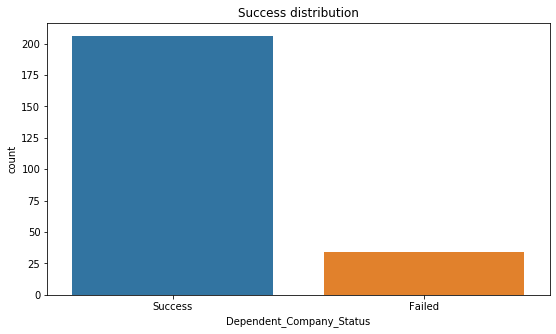

In [360]:
plt.figure(figsize=(9,5))
sns.countplot(data_new.Dependent_Company_Status)
plt.title("Success distribution")
plt.show()

In [361]:
#lets count the benchmark for company success 
data_new.Dependent_Company_Status.value_counts(normalize=True).mul(100).rename("Success percentage")

Success    85.833333
Failed     14.166667
Name: Success percentage, dtype: float64

In [362]:
data_new.Dependent_Company_Status.replace(to_replace=dict(Success=1, Failed=0), inplace=True)
data_new.head()

,Dependent_Company_Status,Age_of_company_in_years,Internet_Activity_Score,Has_the_team_size_grown,Country_of_company,Continent_of_company,Number_of_Investors_in_Seed,Number_of_Investors_in_Angel_and_or_VC,Number_of_Co_founders,Number_of_of_advisors,...,Percent_skill_Marketing,Percent_skill_Data_Science,Percent_skill_Business_Strategy,Percent_skill_Product_Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Finance,Percent_skill_Investment,Renown_score
1,1,3.0,125.0,No,United States,North America,5.0,0.0,2,0,...,12.941176,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,8
2,1,3.0,455.0,No,United States,North America,15.0,0.0,3,0,...,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,9
4,1,4.0,496.0,No,United States,North America,7.0,0.0,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6
5,1,4.0,106.0,No,United States,North America,2.0,0.0,4,0,...,15.625000,3.125000,6.250000,3.125000,3.125000,0.000000,0.0,0.0,0.0,6
7,1,4.0,139.0,No,United States,North America,0.0,0.0,3,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2


# Logit

In [363]:
data_new=pd.get_dummies(data_new,drop_first=True)

In [364]:
#separating X and Y
Y=data_new["Dependent_Company_Status"]
X=data_new.drop("Dependent_Company_Status",axis=1)

#let's split X and Y data into test and train datasets, test data is 20% of overall data
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.20, random_state=42)

In [365]:
#setting Logistic regression parameters range
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,5,100)}

In [366]:
#gridsearching to find best params
#verbose is for showing this sentence-"Fitting 3 folds for each of 200 candidates, totalling 600 fits"
gridsearch_logit = GridSearchCV(estimator=LogisticRegression(random_state=42),
                        param_grid=param_logit,
                        cv=5,scoring='roc_auc',verbose=1,n_jobs=2)
gridsearch_logit.fit(X0,Y0)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 221 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   17.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'C': array([1.00000000e-04...
       4.24243939e+00, 4.29294343e+00, 4.34344747e+00, 4.39395152e+00,
       4.44445556e+00, 4.49495960e+00, 4.54546364e+00, 4.59596768e+00,
       4.64647172e+00, 4.69697576e+00, 4.74747980e+00, 4.79798384e+00,
       4.84848788e+00, 4.89899192e+00, 4.94949596e+00, 5.00000000e+00]),
       

In [367]:
gridsearch_logit.best_params_

{'C': 2.1212696969696974, 'class_weight': 'balanced'}

In [368]:
#let's construct logit with the best parameters 
logit=LogisticRegression(class_weight='balanced',C=2.1212696969696974,random_state=42).fit(X0,Y0)

In [370]:
#getting probabilities of being 1 (probability of having being successful)
Y0_logit=logit.predict_proba(X0)[:,1]
Y1_logit=logit.predict_proba(X1)[:,1]

In [371]:
#calculating roc auc score
print("ROC_AUC Train not scaled Logit:",roc_auc_score(Y0,Y0_logit).round(2))
print("ROC_AUC Test not scaled Logit:",roc_auc_score(Y1,Y1_logit).round(2))
print("Mean 5-fold ROC AUC score for not scaled logit:",np.mean(cross_val_score(estimator=logit, X=X,y=Y,cv=5, scoring="roc_auc").round(2)))

ROC_AUC Train not scaled Logit: 1.0
ROC_AUC Test not scaled Logit: 0.74
Mean 5-fold ROC AUC score for not scaled logit: 0.6519999999999999


#### The Mean 5-fold ROC AUC score for not scaled logit decreased, I decided to stop here, and chose Random Forest as best model buit on datafram- data

### To understand each variable's impact on success lets refer to logit model